Link of Data -> https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data?resource=download

In [2]:
import pandas as pd

In [ ]:
import pickle

In [3]:
df = pd.read_csv('Advert_HSS.csv')

In [89]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [90]:
#df.describe(include='O')
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [92]:
# show up all the nulls
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [93]:
df[df['TV'].isna()]

,TV,Radio,Social Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784
75,NaN,6.482293,0.866845,Macro,91.177216
99,NaN,7.635819,1.554146,Macro,56.186730
119,NaN,30.470485,6.806919,Micro,336.818690
141,NaN,9.164464,1.096681,Macro,65.259189
163,NaN,38.118424,6.676611,Micro,328.555184
183,NaN,1.287060,0.396179,Macro,56.545293
210,NaN,17.007075,5.199635,Macro,208.816382


> before cleaning, lets have check the data visually


In [94]:
numerics = df.drop(columns='Influencer')
cors = numerics.corr()
cors['Sales'].sort_values(ascending=False)

Sales           1.000000
TV              0.999497
Radio           0.869105
Social Media    0.528906
Name: Sales, dtype: float64

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [10]:
def correletion_generator(df):
    lists = ['Radio','Social Media','TV']    
    fig, ax = plt.subplots(1, len(lists), figsize=(18, 6))
    for i,x in enumerate(lists):        
        sns.scatterplot(data=df,x='Sales',y=x,ax=ax[i])
        ax[i].set_title(f'sales vs {x}')

        #Calculate and display the correlation coefficient
        corr_coefficient = df['Sales'].corr(df[x])
        text = f'Corr: {corr_coefficient:.2f}'

        # position
        ax[i].text(0.5, 0.95, text, ha='center', va='center', transform=ax[i].transAxes)
    plt.show()

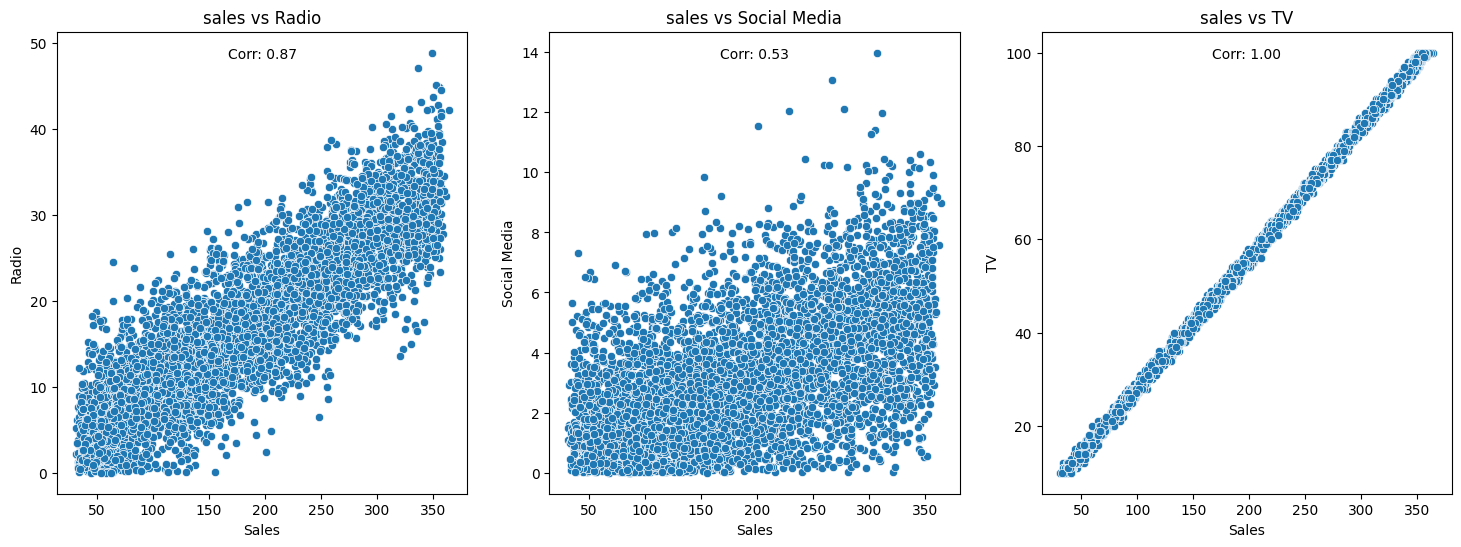

In [11]:
correletion_generator(df)

Text(0.5, 1.0, 'Sales vs Influ')

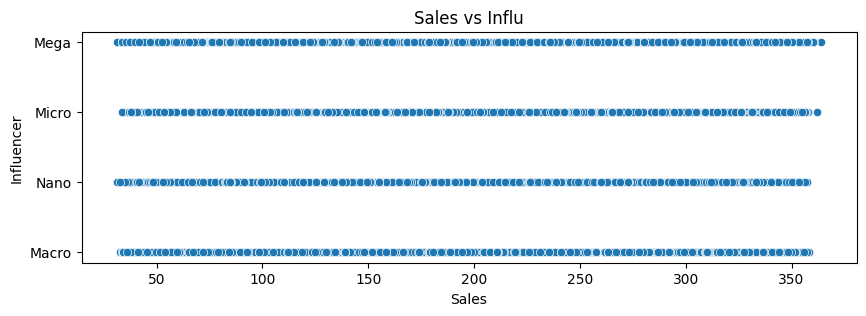

In [12]:
plt.figure(figsize=(10,3))
ax = sns.scatterplot(data=df,y='Influencer',x='Sales')
ax.set_title('Sales vs Influ')


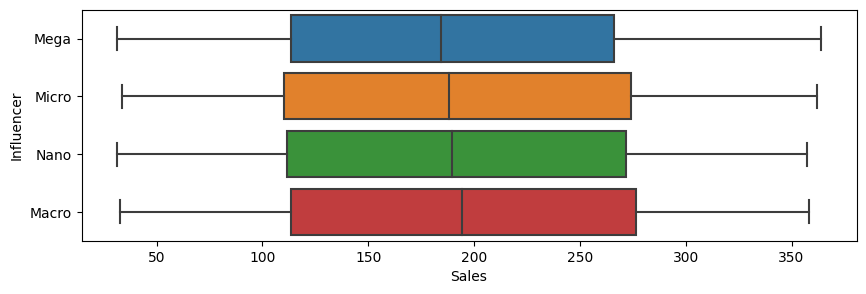

In [12]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x='Sales',y='Influencer')
plt.show()

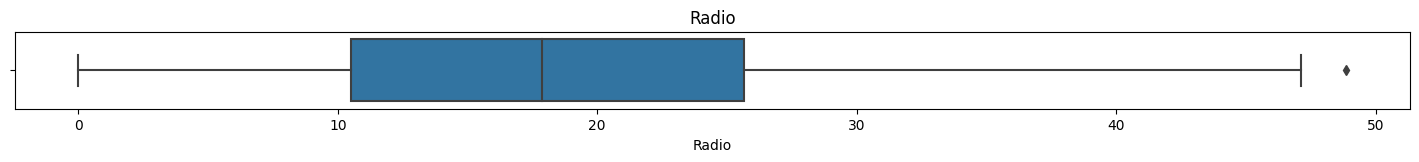

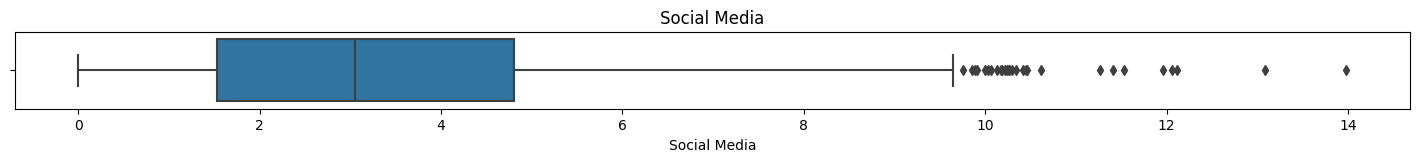

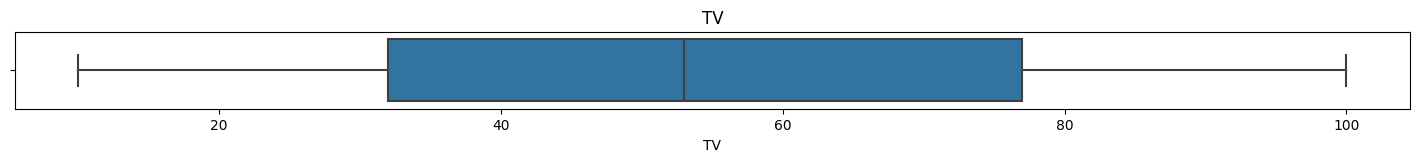

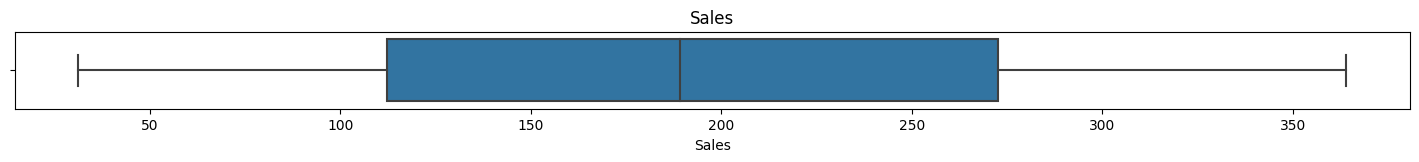

In [13]:
def Univariate(df):
    lists = ['Radio','Social Media','TV','Sales']    
    for i,x in enumerate(lists):
        fig, ax = plt.subplots(1,1, figsize=(18, 1))        
        sns.boxplot(data=df,x=x,ax=ax)
        ax.set_title(f'{x}')
    plt.show()
Univariate(df)

> looks it is safe to clean up `NAN`

In [96]:
# first visullize the % of NANs exist
100* df.isnull().sum() / len(df)

TV              0.218723
Radio           0.087489
Social Media    0.131234
Influencer      0.000000
Sales           0.131234
dtype: float64

In [97]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan
nums = percent_missing(df)

Text(0.5, 1.0, 'Percentage of NANs')

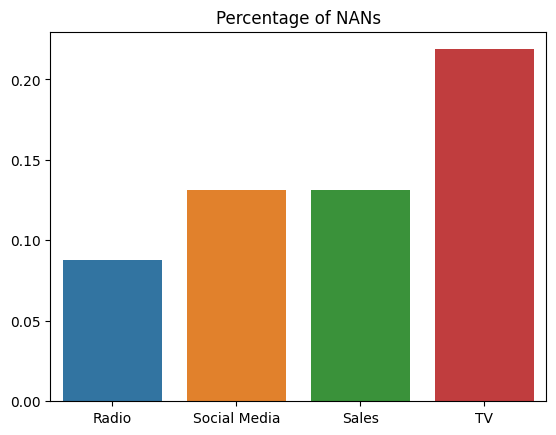

In [98]:
ax= sns.barplot(x=nums.index,y=nums.values)
ax.set_title('Percentage of NANs')

In [99]:
#store y axis indexes for looking up after clean up
tv_indes = df[df['TV'].isna()].index
sales_indes = df[df['Sales'].isna()].index
SM_indes = df[df['Social Media'].isna()].index
radio_indes = df[df['Radio'].isna()].index

In [100]:
# lets fill NANs wtih Interpolation technique (Except TV)
colms_lists = df.drop(columns='TV')
colms_lists = colms_lists.columns
for x in colms_lists:
    df[x].interpolate(inplace=True)

# fill TV with Forword-filling
df['TV'] = df.TV.fillna(method='bfill')



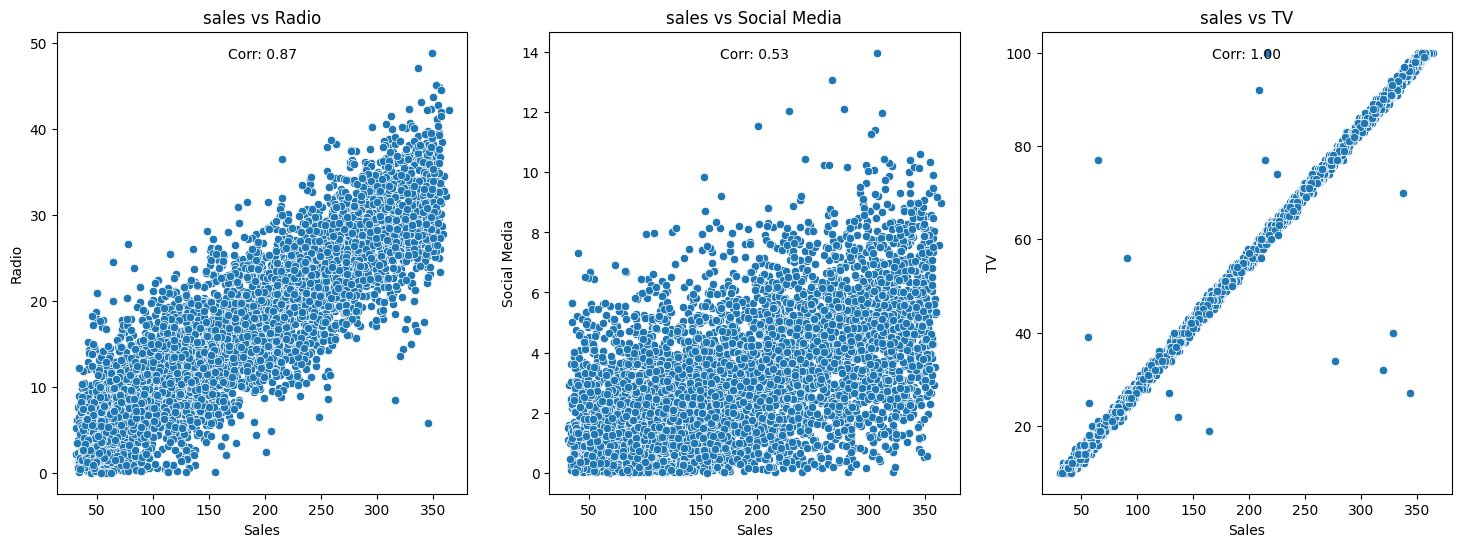

In [101]:
# post correlation =, after cleanup of NAN
correletion_generator(df)

In [102]:
df.head(3)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829


In [103]:
# remove influencer feature
df_2 = df.drop(columns='Influencer')

# Lets start the process of linear regression

> First encode `influncers column` (don't )

In [106]:
## corr of complete colums
corrs = df_2.corr()
corrs['Sales'].sort_values(ascending=True)

Social Media    0.528190
Radio           0.866516
TV              0.995895
Sales           1.000000
Name: Sales, dtype: float64

### TESTING MODELS AND REGULIRSATION (ignore this ) <BR>
* Final model at the bottom

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [30]:
x = df_2.drop(columns='Sales')
y =  df_2['Sales'] 
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

In [32]:
## create model
from sklearn.linear_model import Ridge

In [72]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [35]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f' MAE {MAE} \n Mse {MSE}\n RMSE {RMSE}')

 MAE 4.457207498442632 
 Mse 68.49639594440748
 RMSE 8.27625494679855


> ignore the above model <br>
> Gonna use Cross validation for better model

In [107]:
x = df_2.drop(columns='Sales')
y =  df_2['Sales'] 

# 70% of data is training data, set aside other 30%
X_train, X_OTHER, y_train, y_OTHER = train_test_split(x, y, test_size=0.3, random_state=101)

# Remaining 30% is split into evaluation and test sets
# Each is 15% of the original data size
X_eval, X_test, y_eval, y_test = train_test_split(X_OTHER, y_OTHER, test_size=0.5, random_state=101)

In [108]:
from sklearn.linear_model import LinearRegression

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

In [110]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline,Pipeline


In [111]:

pipeline_model = Pipeline([
    ('poly_features', PolynomialFeatures(5)),
    ('linear_regression', LinearRegression())
])

pipeline_model.fit(X_train, y_train)
y_pred_eval = pipeline_model.predict(X_eval)

mse = mean_squared_error(y_eval, y_pred_eval)
rmse = np.sqrt(mse)

print(f' {rmse:3.3} \n {(rmse/np.mean(y_pred_eval))*100}  %')


 11.3 
 5.825521518000643  %


In [112]:
## on test dataset (real)
y_pre_real = pipeline_model.predict(X_test)
mse = mean_squared_error(y_test, y_pre_real)
rmse = np.sqrt(mse)

print(f' {rmse:3.3} \n {(rmse/np.mean(y_pre_real))*100}  %')

 4.2 
 2.171520444619868  %


------

> After Testing multiple combination of hyperparamters and cross validation,<br>
> `pipeline model` is best perform model.

In [ ]:
### model ###
#pipeline model

#check accuaracy
pd.DataFrame({'Prediction':y_pre_real,"Actual":y_test})

In [113]:
## export the model
import pickle

In [54]:
# pickling the model  alernaive way

#path to save
model_path = r'./ML_system_files/model3.pkl'
with open(model_path,'wb') as model_file:
    pickle.dump(model3, model_file)     


In [55]:
##linear model pickle
model_path = r'./ML_system_files/model4.pkl'
with open(model_path,'wb') as model_file:
    pickle.dump(model4,model_file)

In [114]:
##polynomial model pickle
model_path = r'./ML_system_files/pipeline_model.pkl'
with open(model_path,'wb') as model_file:
    pickle.dump(pipeline_model,model_file)


### TEMPORARY TEST

In [ ]:
test_csv_file = pd.DataFrame(X_train).head(5)

In [221]:
tt = pd.read_csv('ads_cost.csv')